# Jupyter notebook에서 multiprocessing 하기!

주피터 노트북(Jupyter notebook)상에서 멀티 프로세싱(multiprocessing)을 활용하기 위해서는 실제 작업할 함수를 외부 모듈(즉, `*.py`)로 만들어야 한다.

아래 예제의 경우 1.1은 노트북 상에 함수를 선언하고, 해당 함수를 통해 pool에 넣어주면 더 이상 실행되지 않고 멈춰있게 된다.

하지만 1.2의 경우처럼 사용하고자 하는 함수를 외부에 만들어 놓고 불러오면(import하면) 제대로 작동하게 된다.


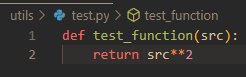

In [9]:
from IPython.display import Image
Image("./file_tree.png")

## 잘 안되는 경우

In [2]:
from multiprocessing import Pool
import multiprocessing as multi
from tqdm import tqdm

In [3]:
# 함수를 jupyter notebook 내부에서 선언
def test_function(src):
    return src**2

In [ ]:
with Pool(4) as pool:
    imap = pool.imap(test_function, list(range(10)))
    results = list(tqdm(imap, total=10, desc="processing"))
print(results)

processing:   0%|                                                                               | 0/10 [00:00<?, ?it/s]

## 잘 되는 경우

In [4]:
from multiprocessing import Pool
import multiprocessing as multi
from tqdm import tqdm

In [5]:
# 함수를 외부 모듈에 만들어 놓고 import!
from utils.test import test_function

In [6]:
with Pool(4) as pool:
    imap = pool.imap(test_function, list(range(10)))
    results = list(tqdm(imap, total=10, desc="processing"))
print(results)

processing: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 144.93it/s]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


# Reference
1. [python multiprocessing 을 Windows jupyter 에서 실행시키기!](https://devkyu.tistory.com/m/920)